# Fourier point source

In [1]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

In [2]:
import numpy as np
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate
from src.interpolate import *

## Important: in Fourier domain, the point is rotated in the fftshifted coordinates (i.e. 0 in the centre) - working now
Now it's working, no need to do it step by step from the next header

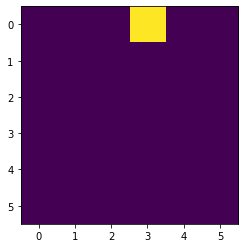

In [3]:
nx = 6
dx = 0.2

v = np.zeros([nx,nx,nx])
v[0,3,3] = 1
#v[1,1,0] = 1

plt.imshow(v[:,:,3])

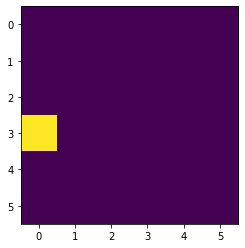

In [4]:
x_freq = np.fft.fftfreq(nx, dx)
y_freq = np.fft.fftfreq(nx, dx)
z_freq = np.fft.fftfreq(nx, dx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

angles = [0,0,np.pi/2]

vr, _, _, _ = project(np.fft.ifftshift(v), X, Y, Z, angles,"nn")
plt.imshow(np.fft.fftshift(vr))

### Do the steps in project

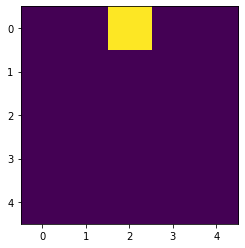

In [5]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[0,2,2] = 1

x_freq = np.fft.fftfreq(nx, dx)
y_freq = np.fft.fftfreq(nx, dx)
z_freq = np.fft.fftfreq(nx, dx)

X, Y, Z = np.meshgrid(x_freq, y_freq, z_freq, indexing = 'xy')

plt.imshow(v[:,:,2])

In [6]:
angles = np.array([0,0,np.pi/2])
X_r, Y_r,Z_r = rotate(X, Y, Z, angles)
slice_coords = np.array([X_r[:,:,0].flatten(), Y_r[:,:,0].flatten(), Z_r[:,:,0].flatten()])

In [7]:
slice_interp = interpolate(slice_coords, x_freq, y_freq, z_freq, np.fft.ifftshift(v),"tri")
slice_interp_2d = np.fft.fftshift(slice_interp.reshape(X_r.shape[0], X_r.shape[1]))

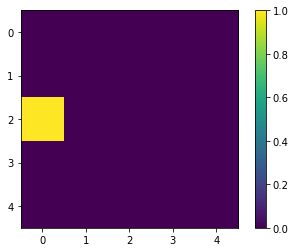

In [8]:
plt.imshow(slice_interp_2d); plt.colorbar()